# ROY Predictions #

In [1]:
# -*- coding: utf-8 -*-#
"""
Created by MinhKhang Nguyen
August 8 2021 9:54 PM
"""

'\nCreated by MinhKhang Nguyen\nAugust 8 2021 9:54 PM\n'

In [2]:
import pandas as pd 
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### Importing Data ####

In [4]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2022_rookies-season-stats.html"
rookie_tables = pd.read_html(html_url, header=1)
len(rookie_tables)
rookie = rookie_tables[0]
rookie.head(25)

,Rk,Player,Debut,Age,Yrs,G,MP,FG,FGA,3P,...,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1
0,1,Santi Aldama,"Oct 27, '21, MEM @ POR",21,1,32,360,53,132,6,...,16,36,132,.402,.125,.625,11.3,4.1,2.7,0.7
1,2,Jose Alvarado,"Nov 3, '21, NOP @ SAC",23,1,54,834,131,294,32,...,40,73,330,.446,.291,.679,15.4,6.1,1.9,2.8
2,3,Joel Ayayi,"Oct 25, '21, WAS @ BRK",21,1,7,20,1,6,0,...,0,0,2,.167,.000,NaN,2.9,0.3,0.4,0.6
3,4,Dalano Banton,"Oct 20, '21, TOR vs. WAS",22,1,64,696,83,202,13,...,53,68,205,.411,.255,.591,10.9,3.2,1.9,1.5
4,5,Cat Barber,"Dec 25, '21, ATL @ NYK",27,1,3,13,0,4,0,...,1,1,0,.000,NaN,.000,4.3,0.0,1.0,1.0
5,6,Scottie Barnes,"Oct 20, '21, TOR vs. WAS",20,1,74,2617,459,932,58,...,136,192,1134,.492,.301,.735,35.4,15.3,7.5,3.5
6,7,Paris Bass,"Jan 2, '22, PHO @ CHO",26,1,2,7,2,6,0,...,2,2,6,.333,.000,1.000,3.5,3.0,2.0,0.0
7,8,Charles Bassey,"Oct 20, '21, PHI @ NOP",21,1,23,168,30,47,0,...,8,32,69,.638,.000,.750,7.3,3.0,2.7,0.3
8,9,Leandro Bolmaro,"Oct 20, '21, MIN vs. HOU",21,1,35,241,17,54,5,...,13,26,50,.315,.278,.846,6.9,1.4,1.2,0.6
9,10,Brandon Boston Jr.,"Oct 25, '21, LAC vs. POR",20,1,51,760,125,325,34,...,31,43,343,.385,.306,.819,14.9,6.7,2.2,1.0


In [5]:
rookie.columns

Index(['Rk', 'Player', 'Debut', 'Age', 'Yrs', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1'],
      dtype='object')

#### Cleaning DataFrame ####

In [6]:
#renames columns to strings only#
rookie.rename(
    columns={
        '3P': 'TP',
        '3PA': 'TPA',
        'FG%': 'FGP',
        '3P%': 'TPP',
        'FT%': 'FTP',
        'MP.1': 'MPG',
        'PTS.1': 'PPG',
        'TRB.1': 'RPG',
        'AST.1': 'APG',
    }, inplace=True)

#removing duplicate players (stats of players that played on different teams)#
rookie.drop_duplicates(subset=['Player'], keep=False, inplace=True)

#Dropping "Rk" Column#
rookie.drop('Rk', axis=1, inplace=True)

#replacing NaN with 0#
rookie.fillna(0, inplace=True)

rookie.head(25)

,Player,Debut,Age,Yrs,G,MP,FG,FGA,TP,TPA,...,TOV,PF,PTS,FGP,TPP,FTP,MPG,PPG,RPG,APG
0,Santi Aldama,"Oct 27, '21, MEM @ POR",21,1,32,360,53,132,6,48,...,16,36,132,.402,.125,.625,11.3,4.1,2.7,0.7
1,Jose Alvarado,"Nov 3, '21, NOP @ SAC",23,1,54,834,131,294,32,110,...,40,73,330,.446,.291,.679,15.4,6.1,1.9,2.8
2,Joel Ayayi,"Oct 25, '21, WAS @ BRK",21,1,7,20,1,6,0,1,...,0,0,2,.167,.000,0,2.9,0.3,0.4,0.6
3,Dalano Banton,"Oct 20, '21, TOR vs. WAS",22,1,64,696,83,202,13,51,...,53,68,205,.411,.255,.591,10.9,3.2,1.9,1.5
4,Cat Barber,"Dec 25, '21, ATL @ NYK",27,1,3,13,0,4,0,0,...,1,1,0,.000,0,.000,4.3,0.0,1.0,1.0
5,Scottie Barnes,"Oct 20, '21, TOR vs. WAS",20,1,74,2617,459,932,58,193,...,136,192,1134,.492,.301,.735,35.4,15.3,7.5,3.5
6,Paris Bass,"Jan 2, '22, PHO @ CHO",26,1,2,7,2,6,0,2,...,2,2,6,.333,.000,1.000,3.5,3.0,2.0,0.0
7,Charles Bassey,"Oct 20, '21, PHI @ NOP",21,1,23,168,30,47,0,4,...,8,32,69,.638,.000,.750,7.3,3.0,2.7,0.3
8,Leandro Bolmaro,"Oct 20, '21, MIN vs. HOU",21,1,35,241,17,54,5,18,...,13,26,50,.315,.278,.846,6.9,1.4,1.2,0.6
9,Brandon Boston Jr.,"Oct 25, '21, LAC vs. POR",20,1,51,760,125,325,34,111,...,31,43,343,.385,.306,.819,14.9,6.7,2.2,1.0


#### Filtering DataFrame ####

In [7]:
rookie[['G','MP','FG','FGA','TP','TPA','FT','FTA','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','FGP','TPP','FTP','MPG','PPG','RPG','APG']] = rookie[['G','MP','FG','FGA','TP','TPA','FT','FTA','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','FGP','TPP','FTP','MPG','PPG','RPG','APG']].apply(pd.to_numeric)

In [8]:
rookie.drop(rookie[rookie['G'] <= 25].index, inplace = True)
rookie.drop(rookie[rookie['TP'] <= 0.1].index, inplace = True)
rookie.drop(rookie[rookie['TPA'] <= 0.1].index, inplace = True)
rookie.drop(rookie[rookie['TPP'] <= 0.1].index, inplace = True)
#rookie.drop(rookie[rookie['PTS'] <= 8].index, inplace = True)#

In [9]:
rookie.drop(['Debut','Yrs','MP','ORB','TRB','AST','PTS'], axis=1, inplace=True)

In [10]:
rookie

,Player,Age,G,FG,FGA,TP,TPA,FT,FTA,STL,BLK,TOV,PF,FGP,TPP,FTP,MPG,PPG,RPG,APG
0,Santi Aldama,21,32,53,132,6,48,20,32,6,10,16,36,0.402,0.125,0.625,11.3,4.1,2.7,0.7
1,Jose Alvarado,23,54,131,294,32,110,36,53,71,7,40,73,0.446,0.291,0.679,15.4,6.1,1.9,2.8
3,Dalano Banton,22,64,83,202,13,51,26,44,28,10,53,68,0.411,0.255,0.591,10.9,3.2,1.9,1.5
5,Scottie Barnes,20,74,459,932,58,193,158,215,80,55,136,192,0.492,0.301,0.735,35.4,15.3,7.5,3.5
8,Leandro Bolmaro,21,35,17,54,5,18,11,13,6,0,13,26,0.315,0.278,0.846,6.9,1.4,1.2,0.6
9,Brandon Boston Jr.,20,51,125,325,34,111,59,72,26,13,31,43,0.385,0.306,0.819,14.9,6.7,2.2,1.0
10,James Bouknight,21,31,49,141,17,49,27,31,7,1,15,29,0.348,0.347,0.871,9.8,4.6,1.7,0.8
12,Greg Brown III,20,48,81,190,19,61,44,65,26,24,36,90,0.426,0.311,0.677,13.3,4.7,2.8,0.7
14,Jared Butler,21,42,61,151,28,88,11,16,17,8,33,47,0.404,0.318,0.688,8.6,3.8,1.1,1.5
16,Justin Champagnie,20,36,31,67,10,28,9,9,8,4,8,32,0.463,0.357,1.000,7.8,2.3,2.0,0.3


#### Processing the Data ####

In [11]:
for index, row in rookie.iterrows():
    rookie.loc[index, "ROY Score"] = (row['PPG']+row['RPG']+(row['STL']/row['G'])+row['APG']+(row['BLK']/row['G'])-(row['TOV']/row['G'])-((row['FGA']-row['FG'])/row['G'])) * (row['PPG']+row['RPG']+(row['STL']/row['G'])+(0.5*(row['APG']))+(0.5*(row['BLK']/row['G']))-((row['FGA']-row['FG'])/row['G'])-(row['TOV']/row['G'])-((row['FTA']-row['FT'])/row['G'])-(0.5*(row['FG'])/row['G']))

#NBA Efficiency Metric = (Points)+(Rebounds)+(Steals)+(Assists)+(Blocked Shots)-(Turnovers)-(Missed Shots)#
#Win Score = (Points)+(Rebounds)+(Steals)+(½Assists)+(½Blocked Shots)-(Field Goal Attempts)-(Turnovers)-½(Free Throw Attempts)-½Personal Fouls#
#My equation = (((FG%*3P%*FT%)NBA Efficiency))(Win Score)#

In [12]:
rookie.sort_values(by=['ROY Score'], ascending=False, inplace=True)
roy = rookie.copy()
roy['ROY Score'] = round(roy['ROY Score'],2)
roy['SPG'] = round(roy['STL']/roy['G'],1)
roy['BLKG'] = round(roy['BLK']/roy['G'],1)
roy['TOVG'] = round(roy['TOV']/roy['G'],1)
roy['PFG'] = round(roy['PF']/roy['G'],1)
roy['FG%'] = roy['FGP']*100
roy['3P%'] = roy['TPP']*100
roy['FT%'] = roy['FTP']*100
roy.drop(['FG','FGA','TP','TPA','FT','FTA','STL','BLK','TOV','PF','FGP','TPP','FTP'], axis=1, inplace=True)

roy.rename(
    columns={
        'MPG': 'MP',
        'PPG': 'PTS',
        'RPG': 'REB',
        'APG': 'AST',
        'SPG': 'STL',
        'BLKG': 'BLK',
        'TOVG': 'TOV',
        'PFG': 'PF',
    }, inplace=True)

roy.head(15)

,Player,Age,G,MP,PTS,REB,AST,ROY Score,STL,BLK,TOV,PF,FG%,3P%,FT%
77,Evan Mobley,20,69,33.8,15.0,8.3,2.5,287.45,0.8,1.7,1.9,2.1,50.8,25.0,66.3
5,Scottie Barnes,20,74,35.4,15.3,7.5,3.5,276.56,1.1,0.7,1.8,2.6,49.2,30.1,73.5
36,Josh Giddey,19,54,31.5,12.5,7.8,6.4,198.17,0.9,0.4,3.2,1.6,41.9,26.3,70.9
23,Cade Cunningham,20,64,32.6,17.4,5.5,5.6,180.81,1.2,0.7,3.7,3.1,41.6,31.4,84.5
121,Franz Wagner,20,79,30.7,15.2,4.5,2.9,172.14,0.9,0.4,1.5,2.1,46.8,35.4,86.3
116,Terry Taylor,22,33,21.6,9.6,5.2,1.2,136.25,0.4,0.2,0.7,1.8,61.4,31.6,70.6
103,Alperen Şengün,19,72,20.7,9.6,5.5,2.6,125.07,0.8,0.9,2.0,3.0,47.4,24.8,71.1
39,Jalen Green,19,67,31.9,17.3,3.4,2.6,124.19,0.7,0.3,2.0,1.5,42.6,34.3,79.7
56,Herbert Jones,23,78,29.9,9.5,3.8,2.1,116.14,1.7,0.8,1.3,3.1,47.6,33.7,84.0
27,Chris Duarte,24,55,28.0,13.1,4.1,2.1,105.39,1.0,0.2,1.6,1.7,43.2,36.9,80.4


#### Visualization ####

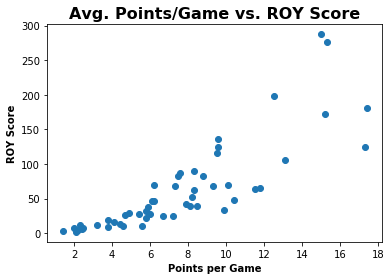

In [13]:
x = roy['PTS']
y = roy['ROY Score']

plt.scatter(x, y)
plt.title('Avg. Points/Game vs. ROY Score', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Points per Game', fontdict={'fontweight':'bold'})
plt.ylabel('ROY Score', fontdict={'fontweight':'bold'})
plt.show()

In [14]:
#plt.savefig('Win Shares vs. MVP Score.png')

In [15]:
roy.set_index(['Player', 'Age', 'G', 'MP','FG%', '3P%', 'FT%', 'TOV', 'PF', 'REB', 'AST', 'STL', 'BLK', 'PTS', 'ROY Score'], inplace=True)
roy = roy.head(15)
roy

,,,,,,,,,,,,,,
Player,Age,G,MP,FG%,3P%,FT%,TOV,PF,REB,AST,STL,BLK,PTS,ROY Score
Evan Mobley,20,69,33.8,50.8,25.0,66.3,1.9,2.1,8.3,2.5,0.8,1.7,15.0,287.45
Scottie Barnes,20,74,35.4,49.2,30.1,73.5,1.8,2.6,7.5,3.5,1.1,0.7,15.3,276.56
Josh Giddey,19,54,31.5,41.9,26.3,70.9,3.2,1.6,7.8,6.4,0.9,0.4,12.5,198.17
Cade Cunningham,20,64,32.6,41.6,31.4,84.5,3.7,3.1,5.5,5.6,1.2,0.7,17.4,180.81
Franz Wagner,20,79,30.7,46.8,35.4,86.3,1.5,2.1,4.5,2.9,0.9,0.4,15.2,172.14
Terry Taylor,22,33,21.6,61.4,31.6,70.6,0.7,1.8,5.2,1.2,0.4,0.2,9.6,136.25
Alperen Şengün,19,72,20.7,47.4,24.8,71.1,2.0,3.0,5.5,2.6,0.8,0.9,9.6,125.07
Jalen Green,19,67,31.9,42.6,34.3,79.7,2.0,1.5,3.4,2.6,0.7,0.3,17.3,124.19
Herbert Jones,23,78,29.9,47.6,33.7,84.0,1.3,3.1,3.8,2.1,1.7,0.8,9.5,116.14


#### Exporting ####

###### ROY Table to CSV ######

In [16]:
import datetime

current_date = datetime.datetime.now()
filename = str(current_date.month)+"-"+str(current_date.day)+"-"+str(current_date.year)
output = roy.to_csv(str("MVP " + filename))

In [17]:
roy.to_csv(output)

'Player,Age,G,MP,FG%,3P%,FT%,TOV,PF,REB,AST,STL,BLK,PTS,ROY Score\r\nEvan Mobley,20,69,33.8,50.8,25.0,66.3,1.9,2.1,8.3,2.5,0.8,1.7,15.0,287.45\r\nScottie Barnes,20,74,35.4,49.2,30.099999999999998,73.5,1.8,2.6,7.5,3.5,1.1,0.7,15.3,276.56\r\nJosh Giddey,19,54,31.5,41.9,26.3,70.89999999999999,3.2,1.6,7.8,6.4,0.9,0.4,12.5,198.17\r\nCade Cunningham,20,64,32.6,41.6,31.4,84.5,3.7,3.1,5.5,5.6,1.2,0.7,17.4,180.81\r\nFranz Wagner,20,79,30.7,46.800000000000004,35.4,86.3,1.5,2.1,4.5,2.9,0.9,0.4,15.2,172.14\r\nTerry Taylor,22,33,21.6,61.4,31.6,70.6,0.7,1.8,5.2,1.2,0.4,0.2,9.6,136.25\r\nAlperen Şengün,19,72,20.7,47.4,24.8,71.1,2.0,3.0,5.5,2.6,0.8,0.9,9.6,125.07\r\nJalen Green,19,67,31.9,42.6,34.300000000000004,79.7,2.0,1.5,3.4,2.6,0.7,0.3,17.3,124.19\r\nHerbert Jones,23,78,29.9,47.599999999999994,33.7,84.0,1.3,3.1,3.8,2.1,1.7,0.8,9.5,116.14\r\nChris Duarte,24,55,28.0,43.2,36.9,80.4,1.6,1.7,4.1,2.1,1.0,0.2,13.1,105.39\r\nIsaiah Jackson,20,36,15.0,56.3,31.3,68.2,1.1,2.6,4.1,0.3,0.7,1.4,8.3,89.45\r\nTr